In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

In [2]:
def DGPFK(grad_f, PK, X0, tau, Nmax, epsilon):
    """
    Implémentation de l'algorithme du Gradient Projeté (Descente de Gradient Projeté).
    
    Arguments :
    - grad_f  : Fonction qui calcule le gradient de f (renvoie un vecteur numpy).
    - PK      : Fonction qui projette un point sur l'ensemble K (renvoie un vecteur numpy).
    - X0      : Point initial (liste ou tableau numpy).
    - tau     : Pas de descente (learning rate), scalaire > 0.
    - Nmax    : Nombre maximal d'itérations (entier).
    - epsilon : Tolérance pour le critère d'arrêt (précision).
    
    Renvoie :
    - X       : La solution approximative (le dernier Xn calculé).
    - iters   : (Optionnel) Liste des points visités pour tracer le graphique plus tard.
    """
    
    # 1. Conversion du point de départ en tableau numpy (vecteur)
    X = np.array(X0, dtype=float)
    
    # On garde en mémoire le chemin parcouru pour la partie graphique 
    iters = [X.copy()]
    
    # 2. Boucle principale
    for k in range(Nmax):
        
        # --- Étape A : Calcul du gradient ---
        g = grad_f(X)
        
        # --- Étape B : Descente (Gradient simple) ---
        # On calcule le point intermédiaire Y = X - tau * gradient
        Y = X - tau * g
        
        # --- Étape C : Projection sur K ---
        # On projette ce point Y sur l'ensemble des contraintes
        X_new = PK(Y)
        
        # --- Étape D : Critère d'arrêt ---
        # Si la distance entre l'ancien et le nouveau point est très petite

        # Critère A : La Stagnation de la Position
        if np.linalg.norm(X_new - X) < epsilon:
            print(f"Convergence atteinte en {k+1} itérations.")
            return X_new, np.array(iters)
        
        # Mise à jour pour l'itération suivante
        X = X_new
        iters.append(X.copy())
        
    # Si on sort de la boucle sans avoir convergé
    print("Attention : Nombre maximal d'itérations atteint.")
    return X, np.array(iters)

In [3]:
# --- 1. Définition du problème ---
def f(X):
    """Fonction coût f(x,y) = x^2 + y^2"""
    return X[0]**2 + X[1]**2

def grad_f(X):
    """Gradient de f : (2x, 2y)"""
    return np.array([2*X[0], 2*X[1]])

def PK(X):
    """Projection sur la droite x + y = 1"""
    x, y = X[0], X[1]
    xp = (1 + x - y) / 2
    yp = (1 - x + y) / 2
    return np.array([xp, yp])


In [4]:
# --- 3. Configuration de l'expérience ---

# Paramètres
points_depart = [[-2.5, -2.0], [2.5, 2.5], [-2.0, 2.0]]
Nmax = 50
epsilon = 1e-4

# Création de la grille pour les lignes de niveau (contours)
x_grid = np.linspace(-3, 3, 100)
y_grid = np.linspace(-3, 3, 100)
X_g, Y_g = np.meshgrid(x_grid, y_grid)
Z = X_g**2 + Y_g**2

Convergence atteinte en 2 itérations.
Point de départ [-2.5, -2.0] -> Solution trouvée : [0.5 0.5], f(sol)=0.5
Convergence atteinte en 2 itérations.
Point de départ [2.5, 2.5] -> Solution trouvée : [0.5 0.5], f(sol)=0.5
Convergence atteinte en 2 itérations.
Point de départ [-2.0, 2.0] -> Solution trouvée : [0.5 0.5], f(sol)=0.5


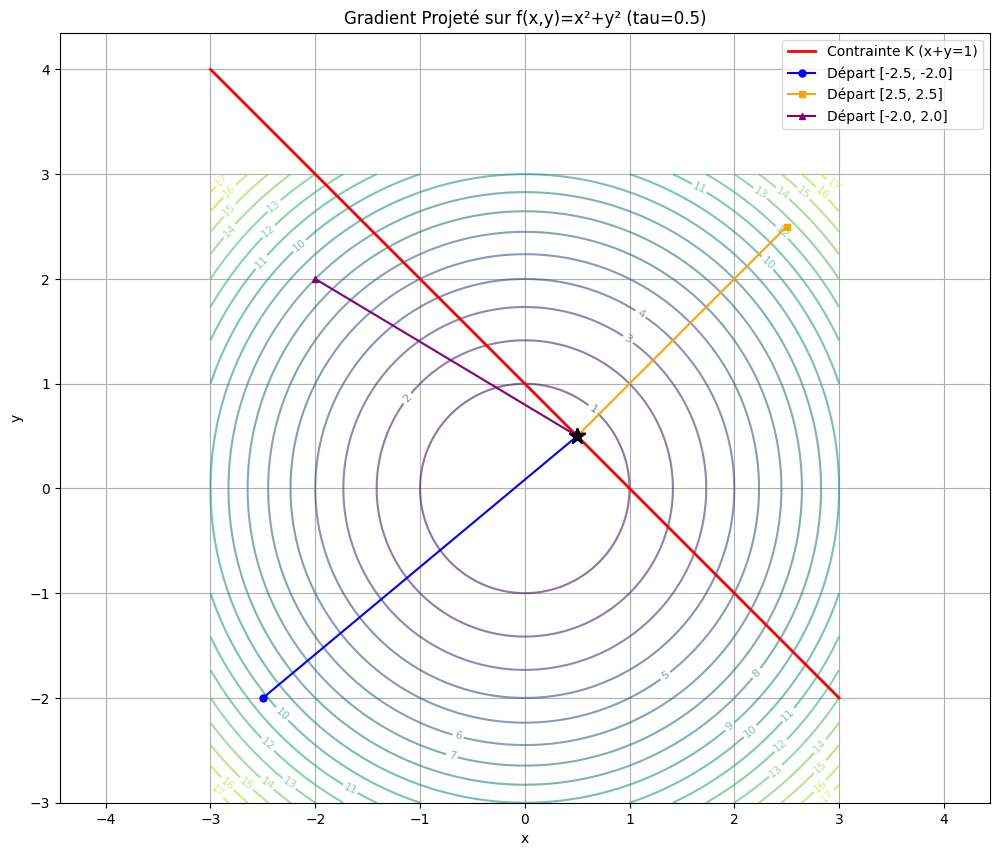

--- Discussion Critères d'arrêt ---
1. Variation de X (||X_{k+1} - X_k|| < eps) : Utilisé ici. Simple, mais peut arrêter trop tôt si la convergence est très lente.
2. Stationnarité (||X - P_K(X - grad f(X))|| < eps) : Plus robuste mathématiquement, mesure à quel point on respecte KKT.


In [5]:
# --- 4. Affichage Graphique ---
plt.figure(figsize=(12, 10))

# A. Tracer les lignes de niveau
contour = plt.contour(X_g, Y_g, Z, levels=20, cmap='viridis', alpha=0.6)
plt.clabel(contour, inline=True, fontsize=8)

# B. Tracer la contrainte (droite rouge)
plt.plot(x_grid, 1 - x_grid, 'r-', linewidth=2, label='Contrainte K (x+y=1)')

# C. Exécution et tracé des trajectoires
colors = ['blue', 'orange', 'purple']
styles = ['o-', 's-', '^-']

# On teste pour un pas fixe tau = 0.4 (le meilleur théorique est proche de 1/L = 0.5)
tau_choisi = 0.5

for i, X0 in enumerate(points_depart):
    sol, chemin = DGPFK(grad_f, PK, X0, tau_choisi, Nmax, epsilon)
    print(f"Point de départ {X0} -> Solution trouvée : {sol}, f(sol)={f(sol)}")
    # Tracé du chemin
    plt.plot(chemin[:, 0], chemin[:, 1], styles[i], 
                color=colors[i], markersize=5, label=f'Départ {X0}')
    
    # Marquer la fin
    plt.plot(sol[0], sol[1], 'k*', markersize=12) # Etoile noire = solution trouvée

# D. Esthétique
plt.title(f"Gradient Projeté sur f(x,y)=x²+y² (tau={tau_choisi})")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.axis('equal') # Important pour voir l'orthogonalité
plt.grid(True)
plt.show()

# --- Discussion des Critères d'arrêt (dans la console) ---
print("--- Discussion Critères d'arrêt ---")
print("1. Variation de X (||X_{k+1} - X_k|| < eps) : Utilisé ici. Simple, mais peut arrêter trop tôt si la convergence est très lente.")
print("2. Stationnarité (||X - P_K(X - grad f(X))|| < eps) : Plus robuste mathématiquement, mesure à quel point on respecte KKT.")

Attention : Nombre maximal d'itérations atteint.
Pour tau=0.05 : Convergence en 50 itérations.
Convergence atteinte en 20 itérations.
Pour tau=0.2 : Convergence en 19 itérations.
Convergence atteinte en 2 itérations.
Pour tau=0.5 : Convergence en 1 itérations.
Attention : Nombre maximal d'itérations atteint.
Pour tau=0.9 : Convergence en 50 itérations.


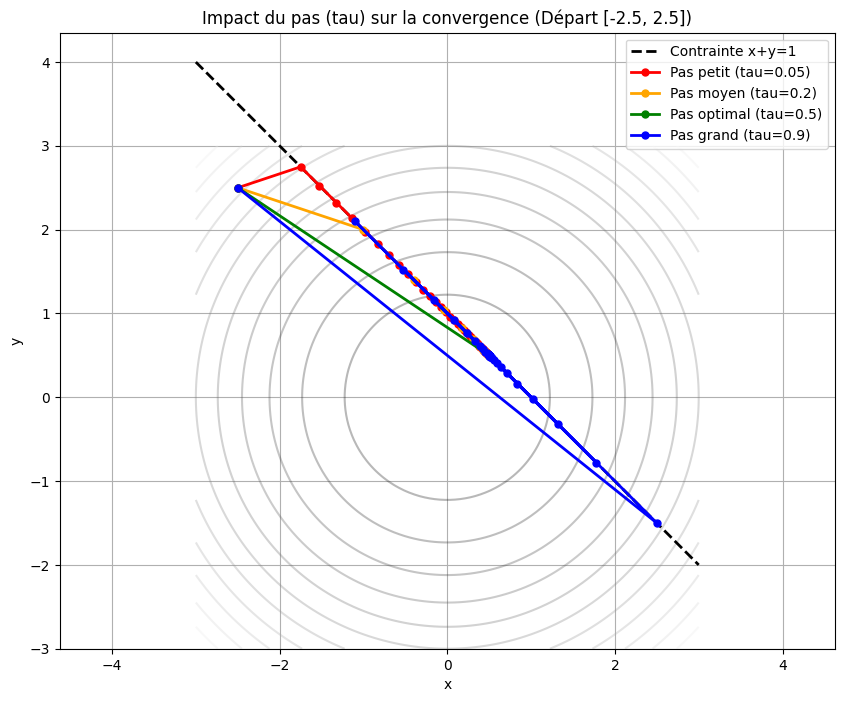

In [17]:
# --- 2. Étude de l'impact du pas (tau) ---
# On fixe UN SEUL point de départ pour bien comparer
X0_fixe = [-2.5, 2.5] 

# On définit plusieurs pas différents
liste_tau = [0.05, 0.2, 0.5, 0.9]

# Paramètres graphiques
colors = ['red', 'orange', 'green', 'blue']
labels = [f'Pas petit (tau={liste_tau[0]})', f'Pas moyen (tau={liste_tau[1]})', f'Pas optimal (tau={liste_tau[2]})', f'Pas grand (tau={liste_tau[3]})']

# Préparation du fond (Lignes de niveau)
x_grid = np.linspace(-3, 3, 100)
y_grid = np.linspace(-3, 3, 100)
X_g, Y_g = np.meshgrid(x_grid, y_grid)
Z = X_g**2 + Y_g**2

plt.figure(figsize=(10, 8))
plt.contour(X_g, Y_g, Z, levels=15, cmap='gray', alpha=0.3) # Fond gris clair
plt.plot(x_grid, 1 - x_grid, 'k--', linewidth=2, label='Contrainte x+y=1') # Ligne noire

# --- 3. Boucle sur les différents PAS (tau) ---

for i, tau in enumerate(liste_tau):
    # On lance l'algo avec le tau courant
    sol, chemin = DGPFK(grad_f, PK, X0_fixe, tau, Nmax=50, epsilon=1e-4)
    
    # On trace le chemin
    plt.plot(chemin[:, 0], chemin[:, 1], 'o-', 
                color=colors[i], 
                linewidth=2, 
                markersize=5, 
                label=labels[i])
    
    # On affiche le nombre d'itérations dans la légende ou console
    print(f"Pour tau={tau} : Convergence en {len(chemin)-1} itérations.")

# Esthétique
plt.title(f"Impact du pas (tau) sur la convergence (Départ {X0_fixe})")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def DGPFK_robuste(grad_f, PK, X0, tau, Nmax, epsilon, safety_limit=1000):
    """
    Algorithme robuste du Gradient Projeté.
    Gère la convergence (succès) ET la divergence (échec) sans planter.
    
    Arguments :
    - safety_limit : Valeur limite (norme) pour détecter une explosion des valeurs.
    """
    
    X = np.array(X0, dtype=float)
    path = [X.copy()]
    status = "Max Iter" # Statut par défaut
    
    print(f"--- Démarrage avec tau={tau} ---")
    
    for k in range(Nmax):
        # 1. Calcul Gradient et Descente
        g = grad_f(X)
        X_desc = X - tau * g
        
        # 2. Projection
        X_new = PK(X_desc)
        
        # 3. GESTION DES CAS (Le Cœur de la robustesse)
        
        # CAS A : Divergence (Explosion des valeurs)
        # Si le point part trop loin, on coupe tout de suite.
        if np.linalg.norm(X_new) > safety_limit:
            status = "DIVERGENCE"
            path.append(X_new.copy()) # On garde le point qui a fait déborder pour voir la direction
            print(f"   -> ARRÊT D'URGENCE à l'itération {k+1} : Le pas est trop grand (Explosion).")
            return X_new, np.array(path), status
            
        # CAS B : Convergence (Succès)
        # Si on ne bouge presque plus
        if np.linalg.norm(X_new - X) < epsilon:
            status = "CONVERGENCE"
            path.append(X_new.copy())
            print(f"   -> Succès : Convergence atteinte en {k+1} itérations.")
            return X_new, np.array(path), status
            
        # Mise à jour pour la suite
        X = X_new
        path.append(X.copy())
        
    print(f"   -> Fin des {Nmax} itérations (Pas de convergence stricte).")
    return X, np.array(path), status

--- Démarrage avec tau=-0.05 ---
   -> Fin des 50 itérations (Pas de convergence stricte).
--- Démarrage avec tau=0.5 ---
   -> Succès : Convergence atteinte en 2 itérations.
--- Démarrage avec tau=1.5 ---
   -> ARRÊT D'URGENCE à l'itération 9 : Le pas est trop grand (Explosion).


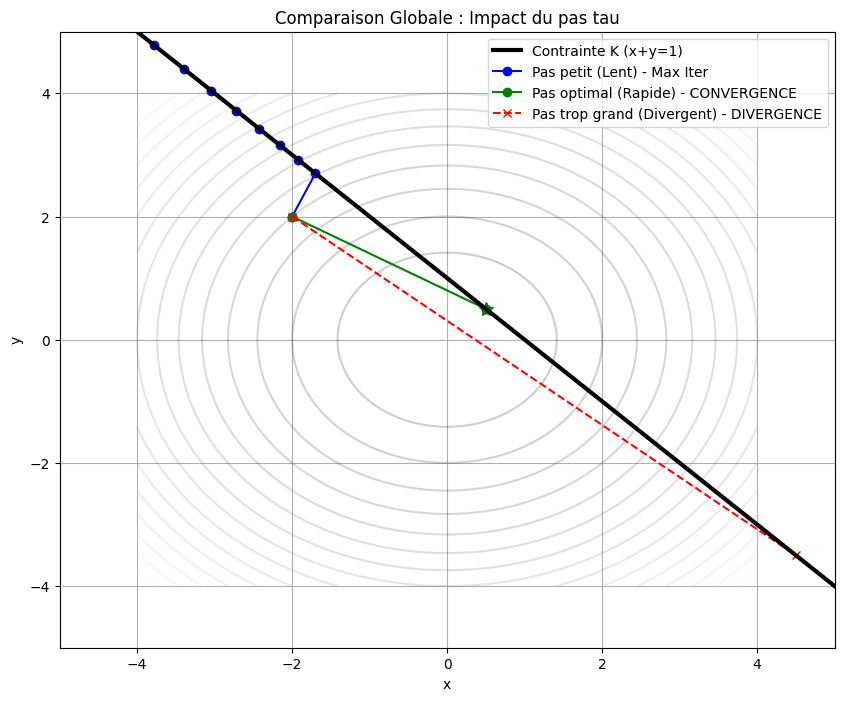

In [8]:
# --- 3. Étude de l'impact du pas (tau) si il n'appartient pas à l'ensemble des pas admissibles ---

# --- Paramètres de l'expérience ---
X0 = [-2.0, 2.0]     # Point de départ
Nmax = 50            # Max itérations
epsilon = 1e-4       # Précision

# Liste des cas à tester : [Pas, Couleur, Description]
scenarios = [
    (-0.05, 'blue', 'Pas petit (Lent)'),
    (0.5,  'green', 'Pas optimal (Rapide)'),
    (1.5,  'red',   'Pas trop grand (Divergent)')
]

# --- Initialisation du Graphique ---
plt.figure(figsize=(10, 8))

# Fond (Lignes de niveau sur zone raisonnable)
x_grid = np.linspace(-4, 4, 100)
y_grid = np.linspace(-4, 4, 100)
X_g, Y_g = np.meshgrid(x_grid, y_grid)
Z = X_g**2 + Y_g**2
plt.contour(X_g, Y_g, Z, levels=20, cmap='gray', alpha=0.2)

# CONTRAINTE K (x + y = 1) - Tracé plus visible
x_contrainte = np.linspace(-5, 5, 200)
y_contrainte = 1 - x_contrainte
plt.plot(x_contrainte, y_contrainte, 'k-', linewidth=3, label='Contrainte K (x+y=1)', zorder=10)

# --- BOUCLE PRINCIPALE ---
for tau, color, label in scenarios:
    
    # Appel de notre ALGORITHME UNIQUE
    sol, chemin, statut = DGPFK_robuste(grad_f, PK, X0, tau, Nmax, epsilon)
    
    # Tracé
    if statut == "DIVERGENCE":
        # Pour la divergence, on trace en pointillés pour bien différencier
        # et on limite l'affichage pour ne pas écraser le graphique
        plt.plot(chemin[:, 0], chemin[:, 1], 'x--', color=color, label=f"{label} - {statut}")
    else:
        plt.plot(chemin[:, 0], chemin[:, 1], 'o-', color=color, label=f"{label} - {statut}")
        # Marquer la fin
        plt.plot(sol[0], sol[1], '*', color=color, markersize=10)

# --- Finitions ---
plt.title(f"Comparaison Globale : Impact du pas tau")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)

# IMPORTANT : On force le zoom sur la zone intéressante 
plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.show()


In [9]:
# Critère B : La Stagnation de la Valeur de la Fonction (Coût)
def DGPFK_Critere_Cout(f, grad_f, PK, X0, tau, Nmax, epsilon):
    """
    Algorithme du Gradient Projeté avec arrêt sur la STAGNATION DU COÛT.
    Critère : | f(X_{n+1}) - f(X_n) | < epsilon
    """
    
    X = np.array(X0, dtype=float)
    path = [X.copy()]
    
    # On calcule la valeur initiale de la fonction
    cout_precedent = f(X)
    
    print(f"--- Démarrage (Critère B : Coût) ---")
    
    for k in range(Nmax):
        # 1. Calcul du gradient
        g = grad_f(X)
        
        # 2. Descente
        X_desc = X - tau * g
        
        # 3. Projection
        X_new = PK(X_desc)
        
        # 4. Calcul du nouveau coût
        cout_actuel = f(X_new)
        
        # --- CRITÈRE D'ARRÊT B ---
        # On regarde si la valeur de la fonction a changé significativement
        variation_cout = abs(cout_actuel - cout_precedent)
        
        if variation_cout < epsilon:
            print(f"   -> Convergence atteinte en {k+1} itérations.")
            print(f"      (Variation du coût : {variation_cout:.6f} < {epsilon})")
            path.append(X_new)
            return X_new, np.array(path)
        
        # Mise à jour pour la suite
        X = X_new
        cout_precedent = cout_actuel
        path.append(X.copy())
        
    print("   -> Nombre max d'itérations atteint.")
    return X, np.array(path)

--- Démarrage (Critère B : Coût) ---
   -> Convergence atteinte en 2 itérations.
      (Variation du coût : 0.000000 < 0.0001)


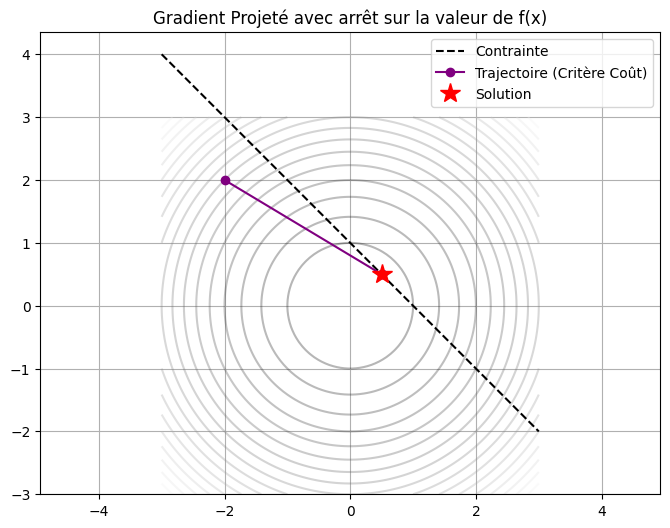

Solution finale : [0.5 0.5]
Valeur finale f(X) : 0.5


In [10]:
# --- Paramètres ---
X0 = [-2.0, 2.0]
tau = 0.5         # Un pas moyen
Nmax = 100
epsilon = 1e-4    # Même tolérance

# --- Exécution ---
sol, chemin = DGPFK_Critere_Cout(f, grad_f, PK, X0, tau, Nmax, epsilon)

# --- Affichage Graphique ---
plt.figure(figsize=(8, 6))

# Fond
x_grid = np.linspace(-3, 3, 100)
y_grid = np.linspace(-3, 3, 100)
X_g, Y_g = np.meshgrid(x_grid, y_grid)
Z = X_g**2 + Y_g**2
plt.contour(X_g, Y_g, Z, levels=20, cmap='gray', alpha=0.3)
plt.plot(x_grid, 1 - x_grid, 'k--', label='Contrainte')

# Trajectoire
plt.plot(chemin[:, 0], chemin[:, 1], 'o-', color='purple', label='Trajectoire (Critère Coût)')
plt.plot(sol[0], sol[1], 'r*', markersize=15, label='Solution')

plt.title("Gradient Projeté avec arrêt sur la valeur de f(x)")
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()

print(f"Solution finale : {sol}")
print(f"Valeur finale f(X) : {f(sol)}")

Calcul en cours............... Terminé !

--- TABLEAU COMPARATIF DES PERFORMANCES ---
  Départ X0  Pas (tau)  Critère  Itérations  Temps (ms)     Sol Finale
[-2.0, 2.0]        0.1     Cout          30      0.2706 [0.498, 0.502]
[-2.0, 2.0]        0.1 Position          51      1.2833     [0.5, 0.5]
[-2.0, 2.0]        0.5     Cout           2      0.0262     [0.5, 0.5]
[-2.0, 2.0]        0.5 Position           2      0.0437     [0.5, 0.5]
[-2.0, 2.0]        0.9     Cout          30      0.3104 [0.498, 0.502]
[-2.0, 2.0]        0.9 Position          60      0.9959     [0.5, 0.5]
 [5.0, 5.0]        0.1     Cout           2      0.0213     [0.5, 0.5]
 [5.0, 5.0]        0.1 Position           2      0.0456     [0.5, 0.5]
 [5.0, 5.0]        0.5     Cout           2      0.0214     [0.5, 0.5]
 [5.0, 5.0]        0.5 Position           2      0.0391     [0.5, 0.5]
 [5.0, 5.0]        0.9     Cout           2      0.0210     [0.5, 0.5]
 [5.0, 5.0]        0.9 Position           2      0.0397     [0

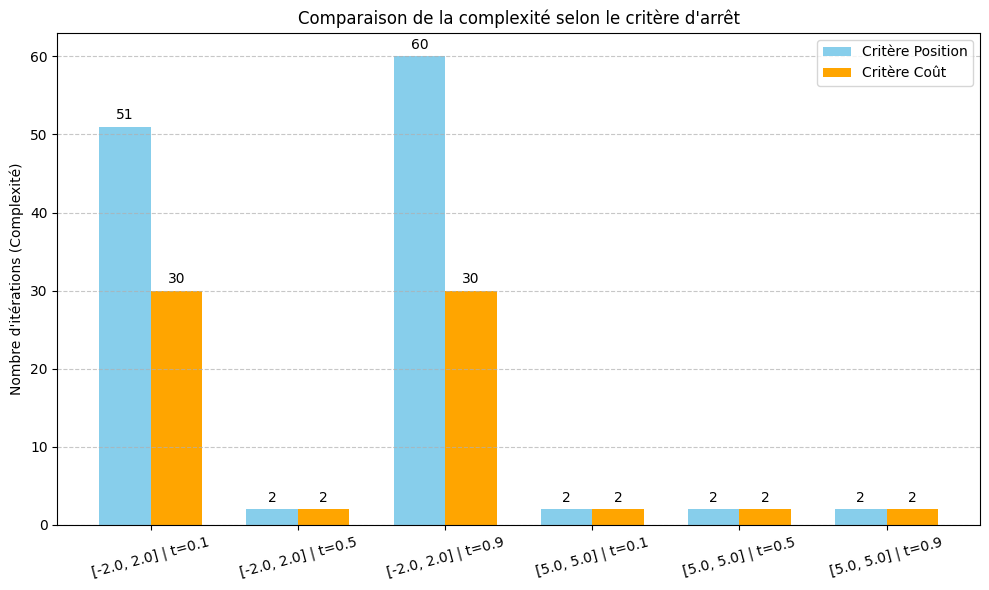

In [11]:
# --- 2. Algorithme DGPFK Polyvalent ---
def DGPFK_Benchmark(critere_type, f, grad_f, PK, X0, tau, Nmax, epsilon):
    """
    Lance l'algo et mesure les performances.
    critere_type : 'Position' (||Xn+1 - Xn||) ou 'Cout' (|f(Xn+1) - f(Xn)|)
    """
    X = np.array(X0, dtype=float)
    cout_precedent = f(X)
    
    # Démarrage du chronomètre
    start_time = time.perf_counter()
    
    iters = 0
    converged = False
    
    for k in range(Nmax):
        g = grad_f(X)
        X_desc = X - tau * g
        X_new = PK(X_desc)
        cout_actuel = f(X_new)
        iters = k + 1
        
        stop = False
        
        # SÉLECTION DU CRITÈRE
        if critere_type == 'Position':
            if np.linalg.norm(X_new - X) < epsilon:
                stop = True
        elif critere_type == 'Cout':
            if abs(cout_actuel - cout_precedent) < epsilon:
                stop = True
        
        if stop:
            converged = True
            X = X_new
            break
            
        X = X_new
        cout_precedent = cout_actuel

    # Arrêt du chronomètre
    end_time = time.perf_counter()
    duree = (end_time - start_time) * 1000 # En millisecondes
    
    return {
        "Critère": critere_type,
        "Départ X0": str(X0),
        "Pas (tau)": tau,
        "Itérations": iters,
        "Temps (ms)": round(duree, 4),
        "Convergé": converged,
        "Sol Finale": np.round(X, 3)
    }

# --- 3. Configuration des Tests ---

# Paramètres globaux
Nmax = 1000
epsilon = 1e-5

# Scénarios à tester
points_depart = [[-2.0, 2.0], [5.0, 5.0]] # Un moyen, un loin
tau_valeurs = [0.1, 0.5, 0.9]                  # Un petit, un moyen (proche optimal)
criteres = ['Position', 'Cout']

resultats = []

# --- 4. Exécution des boucles de test ---

print("Calcul en cours...", end="")
for X0 in points_depart:
    for tau in tau_valeurs:
        for crit in criteres:
            # On lance le test pour chaque combinaison
            res = DGPFK_Benchmark(crit, f, grad_f, PK, X0, tau, Nmax, epsilon)
            resultats.append(res)
            print(".", end="")
print(" Terminé !\n")

# --- 5. Affichage des Résultats (Tableau) ---

df = pd.DataFrame(resultats)

# On trie pour faciliter la comparaison visuelle
df = df.sort_values(by=["Départ X0", "Pas (tau)", "Critère"])

print("--- TABLEAU COMPARATIF DES PERFORMANCES ---")
# Affichage propre avec Pandas
print(df[["Départ X0", "Pas (tau)", "Critère", "Itérations", "Temps (ms)", "Sol Finale"]].to_string(index=False))

# --- 6. Visualisation Graphique (Complexité) ---

# Préparation des données pour le graphe
df['Label'] = df['Départ X0'] + " | t=" + df['Pas (tau)'].astype(str)
labels = df['Label'].unique()
x = np.arange(len(labels))
width = 0.35

iter_pos = df[df['Critère'] == 'Position']['Itérations'].values
iter_cout = df[df['Critère'] == 'Cout']['Itérations'].values

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, iter_pos, width, label='Critère Position', color='skyblue')
rects2 = ax.bar(x + width/2, iter_cout, width, label='Critère Coût', color='orange')

ax.set_ylabel('Nombre d\'itérations (Complexité)')
ax.set_title('Comparaison de la complexité selon le critère d\'arrêt')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=15)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Ajouter les valeurs sur les barres
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

Iter  | X                    | Err KKT (Stat) 
--------------------------------------------------
0     | [0.25 0.75]          | 7.07e-01
10    | [0.473 0.527]        | 7.59e-02
20    | [0.497 0.503]        | 8.15e-03
30    | [0.5 0.5]            | 8.75e-04
40    | [0.5 0.5]            | 9.40e-05

>>> CONVERGENCE à l'itération 40


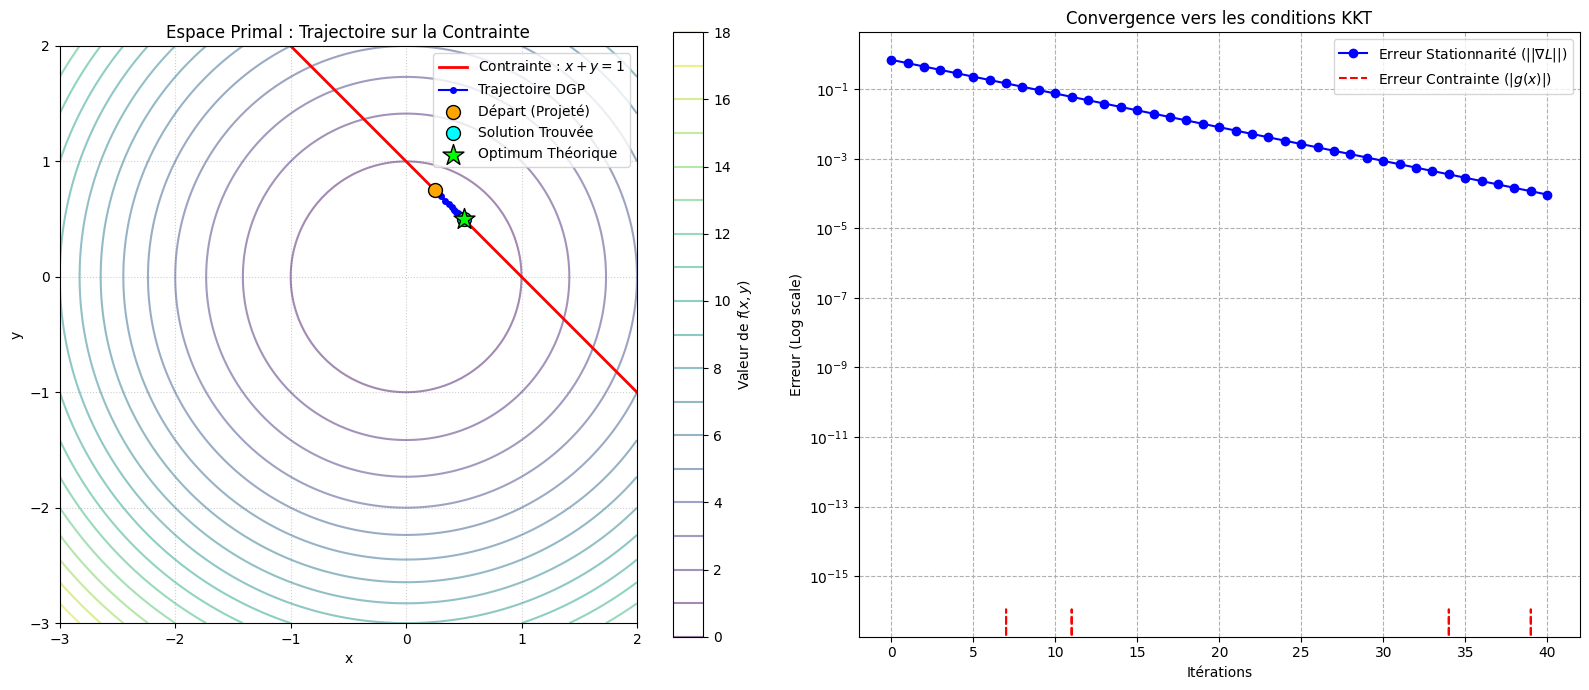

In [26]:
# --- Implémentation de DGPFK avec Résidus KKT ---


# --- 1. Définitions du Problème ---
def f(X): return X[0]**2 + X[1]**2
def grad_f(X): return np.array([2*X[0], 2*X[1]])

def g_func(X): return X[0] + X[1] - 1  # Contrainte x+y-1=0
def grad_g(X): return np.array([1.0, 1.0])

# --- 2. Fonctions Utilitaires ---
def PK(X):
    """Projection orthogonale sur la droite x + y = 1"""
    # Formule : P(x) = x - g(x)/||grad_g||^2 * grad_g
    val_g = g_func(X)
    norm_grad_g_sq = 2.0 
    return X - (val_g / norm_grad_g_sq) * grad_g(X)

def get_kkt_residual(X):
    gf = grad_f(X)
    gg = grad_g(X)
    # Estimation lambda
    lam_est = -np.dot(gf, gg) / np.dot(gg, gg)
    # Résidus
    stationarity = gf + lam_est * gg
    err_stat = np.linalg.norm(stationarity)
    err_constr = abs(g_func(X))
    return err_stat, err_constr, lam_est

# --- 3. Algorithme DGPFK ---
def DGPFK_KKT(X0, tau, Nmax, epsilon_kkt):
    X = np.array(X0, dtype=float)
    X = PK(X) # Projection initiale
    
    history = []
    
    print(f"{'Iter':<5} | {'X':<20} | {'Err KKT (Stat)':<15}")
    print("-" * 50)
    
    for k in range(Nmax):
        err_stat, err_constr, lam = get_kkt_residual(X)
        
        history.append({
            'k': k, 'x': X[0], 'y': X[1],
            'KKT_Stat': err_stat, 'KKT_Constr': err_constr, 'Lambda': lam
        })
        
        if k % 10 == 0:
            print(f"{k:<5} | {str(np.round(X,3)):<20} | {err_stat:.2e}")
        
        if err_stat < epsilon_kkt and err_constr < epsilon_kkt:
            print(f"\n>>> CONVERGENCE à l'itération {k}")
            return X, pd.DataFrame(history)
            
        # Descente + Projection
        d = -grad_f(X)
        X = PK(X + tau * d)
        
    return X, pd.DataFrame(history)

# --- 4. Exécution ---
# Point de départ choisi pour être loin de l'optimum mais sur la droite après projection
X0 = [-2.5, -2.0] 
tau = 0.1 
Nmax = 100
epsilon_kkt = 1e-4

sol, df = DGPFK_KKT(X0, tau, Nmax, epsilon_kkt)

# --- 5. VISUALISATION AVANCÉE ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# --- GRAPHIQUE 1 : Trajectoire 2D ---
# 1. Création de la grille pour les contours (Isolignes de f)
x_vals = np.linspace(-3, 2, 100)
y_vals = np.linspace(-3, 2, 100)
X_grid, Y_grid = np.meshgrid(x_vals, y_vals)
Z_grid = X_grid**2 + Y_grid**2 # La fonction f(x)

# 2. Affichage des contours
cp = ax1.contour(X_grid, Y_grid, Z_grid, levels=20, cmap='viridis', alpha=0.5)
plt.colorbar(cp, ax=ax1, label='Valeur de $f(x,y)$')

# 3. Affichage de la Contrainte (La droite x+y=1 => y = 1-x)
ax1.plot(x_vals, 1 - x_vals, 'r-', linewidth=2, label='Contrainte : $x+y=1$')

# 4. Affichage du Chemin de l'algorithme
ax1.plot(df['x'], df['y'], 'b-o', markersize=4, linewidth=1.5, label='Trajectoire DGP')

# 5. Points Clés (Départ, Arrivée, Optimum Théorique)
start_x, start_y = df.iloc[0]['x'], df.iloc[0]['y']
end_x, end_y = df.iloc[-1]['x'], df.iloc[-1]['y']

ax1.scatter(start_x, start_y, color='orange', s=100, zorder=5, label='Départ (Projeté)', edgecolors='black')
ax1.scatter(end_x, end_y, color='cyan', s=100, zorder=5, label='Solution Trouvée', edgecolors='black')
ax1.scatter(0.5, 0.5, color='lime', marker='*', s=250, zorder=6, label='Optimum Théorique', edgecolors='black')

# Décoration Graphe 1
ax1.set_title("Espace Primal : Trajectoire sur la Contrainte")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.legend()
ax1.grid(True, linestyle=':', alpha=0.6)
ax1.set_xlim([-3, 2])
ax1.set_ylim([-3, 2])
ax1.set_aspect('equal') # Important pour voir les cercles comme des cercles

# --- GRAPHIQUE 2 : Convergence KKT ---
ax2.plot(df['k'], df['KKT_Stat'], 'b-o', label='Erreur Stationnarité ($||\\nabla L||$)')
ax2.plot(df['k'], df['KKT_Constr'], 'r--', label='Erreur Contrainte ($|g(x)|$)')

# Décoration Graphe 2
ax2.set_yscale('log')
ax2.set_xlabel('Itérations')
ax2.set_ylabel('Erreur (Log scale)')
ax2.set_title('Convergence vers les conditions KKT')
ax2.legend()
ax2.grid(True, which="both", linestyle='--')

plt.tight_layout()
plt.show()

Exécution du Benchmark............... Terminé !

--- TABLEAU COMPARATIF ---
   Départ X0  Pas (tau)  Critère  Itérations  Temps (ms)
[-2.5, -1.0]        0.1     Cout          25      0.2862
[-2.5, -1.0]        0.1      KKT          55      3.4307
[-2.5, -1.0]        0.1 Position          46      0.8813
  [5.0, 5.0]        0.1     Cout           1      0.0136
  [5.0, 5.0]        0.1      KKT           1      0.0482
  [5.0, 5.0]        0.1 Position           1      0.0239
[-2.5, -1.0]        0.5     Cout           2      0.0295
[-2.5, -1.0]        0.5      KKT           1      0.0552
[-2.5, -1.0]        0.5 Position           2      0.0619
  [5.0, 5.0]        0.5     Cout           1      0.0134
  [5.0, 5.0]        0.5      KKT           1      0.0486
  [5.0, 5.0]        0.5 Position           1      0.0230


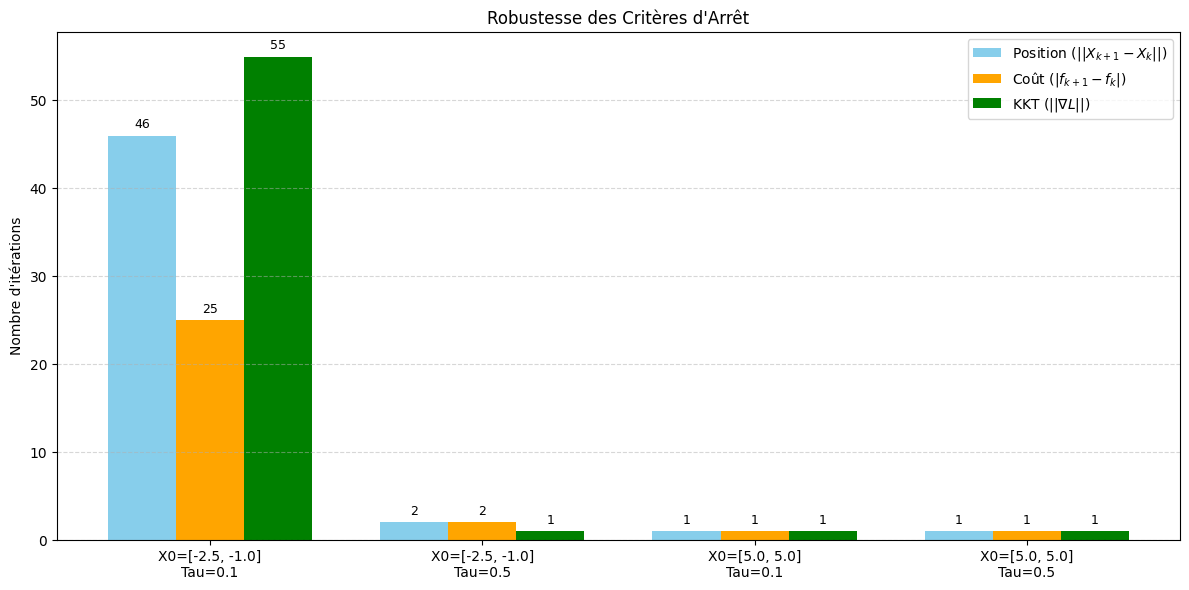

In [28]:
def get_kkt_error(X):
    """
    Calcule les erreurs KKT pour un point X.
    Retourne (stationarity_error, feasibility_error)
    """
    # Gradient du Lagrangien : ∇f(X) - λ*∇h(X)
    g = grad_f(X)
    
    # Pour la contrainte h(X) = x + y - 1 = 0
    # ∇h = [1, 1]
    grad_h = np.array([1.0, 1.0])
    
    # Calcul du multiplicateur de Lagrange optimal
    # λ = (∇f · ∇h) / (∇h · ∇h)
    lambda_opt = np.dot(g, grad_h) / np.dot(grad_h, grad_h)
    
    # Erreur de stationnarité : ||∇f - λ*∇h||
    grad_lagrangien = g - lambda_opt * grad_h
    stat_err = np.linalg.norm(grad_lagrangien)
    
    # Erreur de faisabilité : |h(X)|
    h_val = X[0] + X[1] - 1.0
    feas_err = abs(h_val)
    
    return stat_err, feas_err

def DGPFK_Benchmark_KKT(critere_type, X0, tau, Nmax, epsilon):
    X = np.array(X0, dtype=float)
    # Projection initiale pour être juste envers KKT (qui exige la faisabilité)
    X = PK(X) 
    
    cout_precedent = f(X)
    iters = 0
    converged = False
    
    start_time = time.perf_counter()
    
    for k in range(Nmax):
        # 1. Descente & Projection
        g = grad_f(X)
        X_desc = X - tau * g
        X_new = PK(X_desc)
        
        stop = False
        iters = k + 1
        
        # 2. SÉLECTION DU CRITÈRE D'ARRÊT
        if critere_type == 'Position':
            # On s'arrête si on ne bouge plus assez
            if np.linalg.norm(X_new - X) < epsilon:
                stop = True
                
        elif critere_type == 'Cout':
            # On s'arrête si le coût ne baisse plus assez
            cout_actuel = f(X_new)
            if abs(cout_actuel - cout_precedent) < epsilon:
                stop = True
            cout_precedent = cout_actuel
            
        elif critere_type == 'KKT':
            # On s'arrête si les conditions d'optimalité sont satisfaites
            # Note: On teste X_new car c'est le candidat actuel
            stat_err, feas_err = get_kkt_error(X_new)
            if stat_err < epsilon and feas_err < epsilon:
                stop = True

        X = X_new
        
        if stop:
            converged = True
            break

    end_time = time.perf_counter()
    duree = (end_time - start_time) * 1000 # ms
    
    return {
        "Critère": critere_type,
        "Départ X0": str(X0),
        "Pas (tau)": tau,
        "Itérations": iters,
        "Temps (ms)": round(duree, 4),
        "Sol Finale": np.round(X, 3)
    }

# --- 3. Configuration des Tests ---
Nmax = 2000
epsilon = 1e-5

# On teste 3 critères maintenant
criteres = ['Position', 'Cout', 'KKT']
# Un point loin, un point moyen
points_depart = [[-2.5, -1.0], [5.0, 5.0]] 
# Pas : Petit (0.1) et Moyen (0.5)
tau_valeurs = [0.1, 0.5]

resultats = []

print("Exécution du Benchmark...", end="")
for X0 in points_depart:
    for tau in tau_valeurs:
        for crit in criteres:
            res = DGPFK_Benchmark_KKT(crit, X0, tau, Nmax, epsilon)
            resultats.append(res)
            print(".", end="")
print(" Terminé !")

# --- 4. Affichage Tableau ---
df = pd.DataFrame(resultats)
cols = ["Départ X0", "Pas (tau)", "Critère", "Itérations", "Temps (ms)"]
print("\n--- TABLEAU COMPARATIF ---")
print(df[cols].sort_values(by=["Pas (tau)", "Départ X0", "Critère"]).to_string(index=False))

# --- 5. Visualisation Graphique (3 Barres) ---
# Création d'une colonne de label unique pour l'axe X
df['Scenario'] = "X0=" + df['Départ X0'] + "\nTau=" + df['Pas (tau)'].astype(str)
scenarios = df['Scenario'].unique()

# Extraction des données
pos_vals = []
cout_vals = []
kkt_vals = []

for sc in scenarios:
    sub = df[df['Scenario'] == sc]
    pos_vals.append(sub[sub['Critère'] == 'Position']['Itérations'].values[0])
    cout_vals.append(sub[sub['Critère'] == 'Cout']['Itérations'].values[0])
    kkt_vals.append(sub[sub['Critère'] == 'KKT']['Itérations'].values[0])

# Plot
x = np.arange(len(scenarios))
width = 0.25  # Largeur des barres

fig, ax = plt.subplots(figsize=(12, 6))
r1 = ax.bar(x - width, pos_vals, width, label='Position ($||X_{k+1}-X_k||$)', color='skyblue')
r2 = ax.bar(x, cout_vals, width, label='Coût ($|f_{k+1}-f_k|$)', color='orange')
r3 = ax.bar(x + width, kkt_vals, width, label='KKT ($||\\nabla L||$)', color='green')

ax.set_ylabel('Nombre d\'itérations')
ax.set_title('Robustesse des Critères d\'Arrêt')
ax.set_xticks(x)
ax.set_xticklabels(scenarios, rotation=0)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Labels sur les barres
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

autolabel(r1)
autolabel(r2)
autolabel(r3)

plt.tight_layout()
plt.show()

In [12]:
# --- 4. Descente de Gradient Projeté à Pas Variable (DGPV) ---
def DGPV(grad_f, PK, X0, alpha1, alpha2, Nmax, epsilon):
    """
    Descente de Gradient Projeté à Pas Variable (Aléatoire dans les bornes).
    
    Arguments :
    - alpha1, alpha2 : Bornes min et max pour le pas tau_n.
    """
    
    X = np.array(X0, dtype=float)
    path = [X.copy()]
    history_tau = [] # On va garder en mémoire les pas utilisés pour vérifier
    
    print(f"--- Démarrage DGPV (Pas variable entre {alpha1} et {alpha2}) ---")
    
    for k in range(Nmax):
        # 1. Choix du pas variable pour cette itération
        # On tire un nombre aléatoire uniforme entre alpha1 et alpha2
        tau_n = np.random.uniform(alpha1, alpha2)
        history_tau.append(tau_n)
        
        # 2. Calcul du gradient
        g = grad_f(X)
        
        # 3. Descente avec le pas tau_n courant
        X_desc = X - tau_n * g
        
        # 4. Projection
        X_new = PK(X_desc)
        
        # 5. Critère d'arrêt (Position)
        if np.linalg.norm(X_new - X) < epsilon:
            print(f"   -> Convergence en {k+1} itérations.")
            return X_new, np.array(path), history_tau
        
        X = X_new
        path.append(X.copy())
        
    print("   -> Max itérations atteint.")
    return X, np.array(path), history_tau

--- Démarrage DGPV (Pas variable entre 0.1 et 0.9) ---
   -> Convergence en 7 itérations.


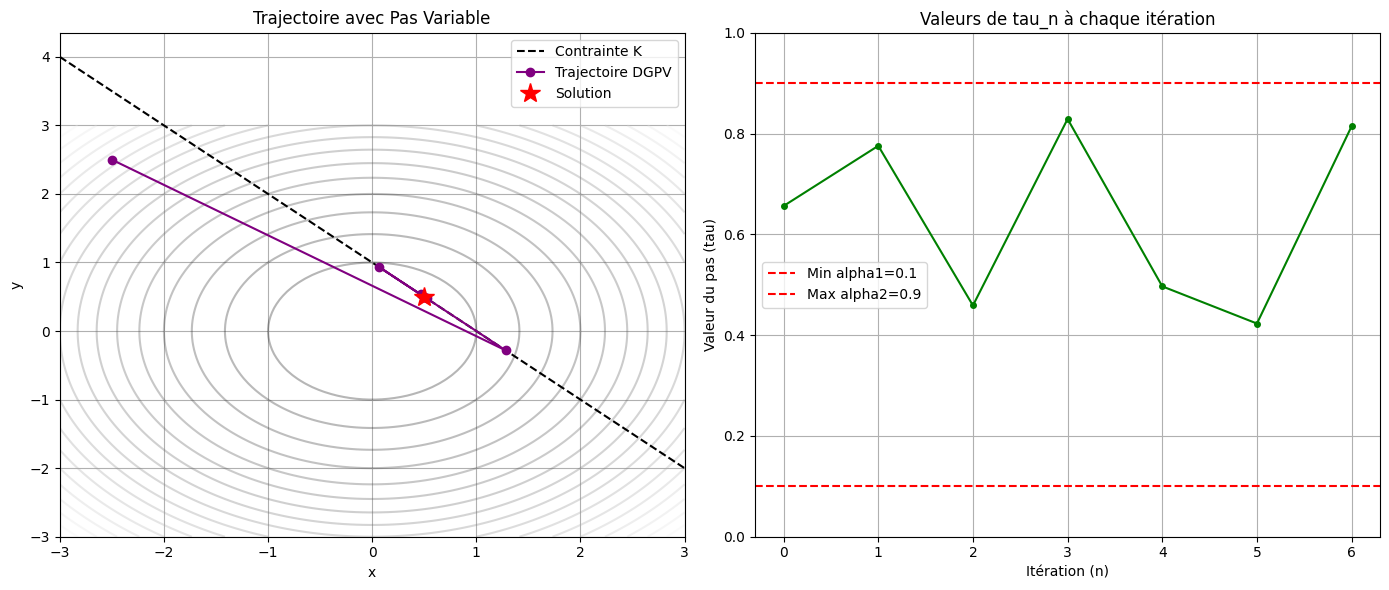

Solution finale : [0.49998588 0.50001412]
Nombre d'itérations : 7
Exemple des 5 premiers pas utilisés : [0.656 0.776 0.459 0.829 0.497]


In [13]:
# --- Paramètres ---
X0 = [-2.5, 2.5]
alpha1 = 0.1       # Borne min
alpha2 = 0.9       # Borne max (< 1)
Nmax = 50
epsilon = 1e-4

# --- Exécution ---
sol, chemin, hist_tau = DGPV(grad_f, PK, X0, alpha1, alpha2, Nmax, epsilon)

# --- Affichage Graphique (Double panneau) ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# GRAPHIQUE 1 : La trajectoire
x_grid = np.linspace(-3, 3, 100)
y_grid = np.linspace(-3, 3, 100)
X_g, Y_g = np.meshgrid(x_grid, y_grid)
Z = X_g**2 + Y_g**2

ax1.contour(X_g, Y_g, Z, levels=20, cmap='gray', alpha=0.3)
ax1.plot(x_grid, 1 - x_grid, 'k--', label='Contrainte K')
ax1.plot(chemin[:, 0], chemin[:, 1], 'o-', color='purple', label='Trajectoire DGPV')
ax1.plot(sol[0], sol[1], 'r*', markersize=15, label='Solution')
ax1.set_title("Trajectoire avec Pas Variable")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.legend()
ax1.grid(True)

# GRAPHIQUE 2 : L'évolution du pas tau
ax2.plot(hist_tau, 'o-', color='green', markersize=4)
ax2.axhline(y=alpha1, color='r', linestyle='--', label=f'Min alpha1={alpha1}')
ax2.axhline(y=alpha2, color='r', linestyle='--', label=f'Max alpha2={alpha2}')
ax2.set_title(f"Valeurs de tau_n à chaque itération")
ax2.set_xlabel("Itération (n)")
ax2.set_ylabel("Valeur du pas (tau)")
ax2.set_ylim(0, 1.0)
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

print(f"Solution finale : {sol}")
print(f"Nombre d'itérations : {len(hist_tau)}")
print(f"Exemple des 5 premiers pas utilisés : {np.round(hist_tau[:5], 3)}")

Benchmark en cours...
Terminé.

        Départ         Mode  Itérations
   [-2.0, 2.0] Fixe_Optimal           2
   [-2.0, 2.0]     Variable          10
    [5.0, 5.0] Fixe_Optimal           2
    [5.0, 5.0]     Variable           2
[-10.0, -10.0] Fixe_Optimal           2
[-10.0, -10.0]     Variable           2


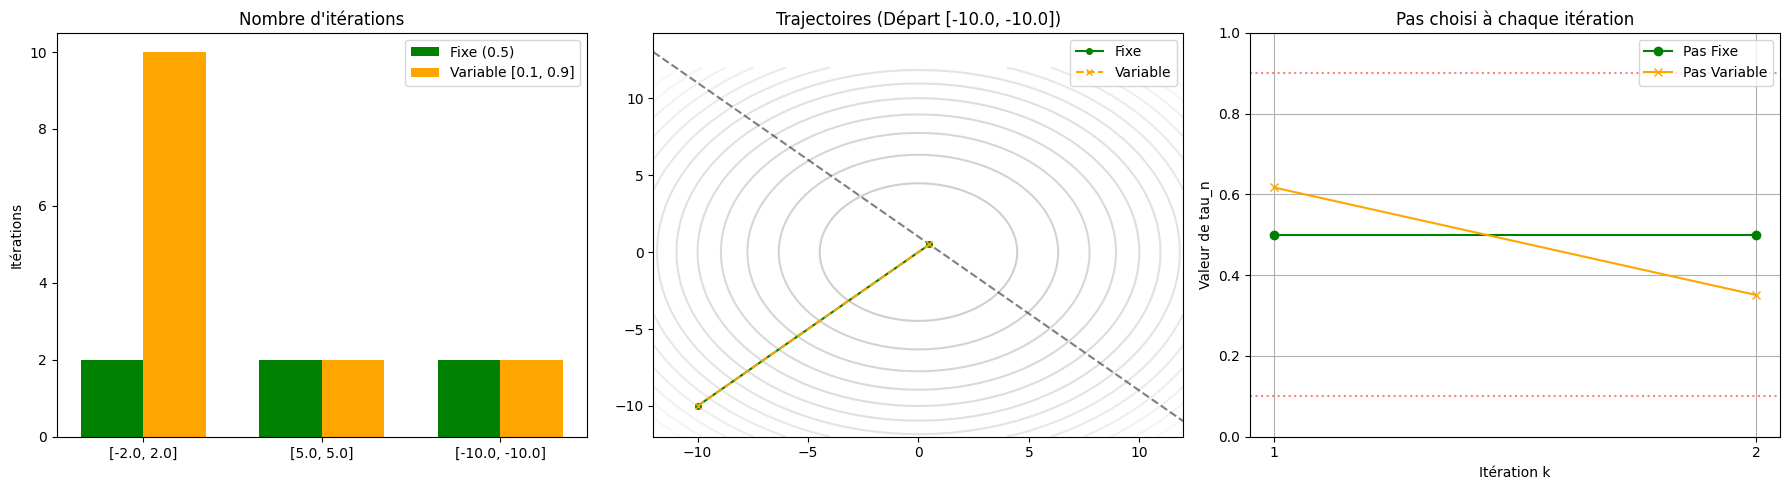


--- Zoom sur les pas variables générés (Cas -10, -10) ---
[0.6171 0.351 ]


In [14]:
# Moteur d'Optimisation Unique 
def run_optimization(mode, X0, Nmax, epsilon):
    """
    Exécute l'algorithme et enregistre l'historique des pas (tau).
    """
    X = np.array(X0, dtype=float)
    path = [X.copy()]
    tau_history = []  
    
    start_time = time.perf_counter()
    
    for k in range(Nmax):
        # Choix du pas selon le mode
        if mode == 'Fixe_Optimal':
            tau = 0.5 
        else:
            # Mode Variable : Aléatoire entre 0.1 et 0.9
            tau = np.random.uniform(0.1, 0.9)
            
        tau_history.append(tau) # <--- On enregistre le pas utilisé
            
        # Algorithme standard
        g = grad_f(X)
        X_desc = X - tau * g
        X_new = PK(X_desc)
        
        # Critère d'arrêt
        if np.linalg.norm(X_new - X) < epsilon:
            end_time = time.perf_counter()
            return {
                "Mode": mode,
                "Départ": str(X0),
                "Itérations": k + 1,
                "Temps (ms)": (end_time - start_time) * 1000,
                "Chemin": np.array(path),
                "Historique_Tau": np.array(tau_history), # On retourne l'historique
                "Final": X_new
            }
        
        X = X_new
        path.append(X.copy())
        
    end_time = time.perf_counter()
    return {
        "Mode": mode,
        "Départ": str(X0),
        "Itérations": Nmax,
        "Temps (ms)": (end_time - start_time) * 1000,
        "Chemin": np.array(path),
        "Historique_Tau": np.array(tau_history), # On retourne l'historique
        "Final": X
    }

# --- 3. Configuration ---
points_depart = [
    [-2.0, 2.0],   
    [5.0, 5.0],    
    [-10.0, -10.0] 
]
Nmax = 200
epsilon = 1e-5
resultats = []

# --- 4. Exécution ---
print("Benchmark en cours...")
for X0 in points_depart:
    resultats.append(run_optimization('Fixe_Optimal', X0, Nmax, epsilon))
    resultats.append(run_optimization('Variable', X0, Nmax, epsilon))
print("Terminé.\n")

# --- 5. Tableau des résultats ---
df = pd.DataFrame(resultats)
# On affiche un résumé
print(df[["Départ", "Mode", "Itérations"]].to_string(index=False))

# --- 6. Visualisation (3 Graphiques maintenant) ---
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# --- GRAPHIQUE 1 : Complexité (Itérations) ---
x = np.arange(len(points_depart))
width = 0.35
vals_fixe = df[df['Mode']=='Fixe_Optimal']['Itérations'].values
vals_var = df[df['Mode']=='Variable']['Itérations'].values

rects1 = ax1.bar(x - width/2, vals_fixe, width, label='Fixe (0.5)', color='green')
rects2 = ax1.bar(x + width/2, vals_var, width, label='Variable [0.1, 0.9]', color='orange')
ax1.set_ylabel('Itérations')
ax1.set_title('Nombre d\'itérations')
ax1.set_xticks(x)
ax1.set_xticklabels([str(p) for p in points_depart])
ax1.legend()

# --- GRAPHIQUE 2 : Trajectoires (Dernier cas) ---
res_fixe_last = resultats[-2]
res_var_last = resultats[-1]

limit = 12
x_grid = np.linspace(-limit, limit, 100)
y_grid = np.linspace(-limit, limit, 100)
X_g, Y_g = np.meshgrid(x_grid, y_grid)
ax2.contour(X_g, Y_g, X_g**2 + Y_g**2, levels=15, cmap='gray', alpha=0.2)
ax2.plot(x_grid, 1-x_grid, 'k--', alpha=0.5)

ax2.plot(res_fixe_last['Chemin'][:,0], res_fixe_last['Chemin'][:,1], 'o-', color='green', markersize=4, label='Fixe')
ax2.plot(res_var_last['Chemin'][:,0], res_var_last['Chemin'][:,1], 'x--', color='orange', markersize=4, label='Variable')
ax2.set_title(f'Trajectoires (Départ {points_depart[-1]})')
ax2.legend()

# --- GRAPHIQUE 3 : Évolution du PAS (Tau) ---
# On trace les pas utilisés pour le dernier cas (-10, -10)
taus_fixe = res_fixe_last['Historique_Tau']
taus_var = res_var_last['Historique_Tau']

iter_fixe = np.arange(1, len(taus_fixe) + 1) # [1, 2, 3...]
iter_var = np.arange(1, len(taus_var) + 1)   # [1, 2, 3...]

ax3.plot(iter_fixe, taus_fixe, 'o-', color='green', label='Pas Fixe')
ax3.plot(iter_var, taus_var, 'x-', color='orange', label='Pas Variable')

ax3.axhline(y=0.1, color='r', linestyle=':', alpha=0.5) # Borne min
ax3.axhline(y=0.9, color='r', linestyle=':', alpha=0.5) # Borne max

ax3.set_title("Pas choisi à chaque itération")
ax3.set_xlabel("Itération k")
ax3.set_ylabel("Valeur de tau_n")
ax3.set_ylim(0, 1.0)

# Forcer les ticks à être seulement des entiers (pas de 1.5, 2.5)
from matplotlib.ticker import MaxNLocator
ax3.xaxis.set_major_locator(MaxNLocator(integer=True))

ax3.legend()
ax3.grid(True)

plt.tight_layout()
plt.show()

# Affichage des 10 premiers pas variables pour vérification
print("\n--- Zoom sur les pas variables générés (Cas -10, -10) ---")
if len(taus_var) > 0:
    print(np.round(taus_var[:10], 4))

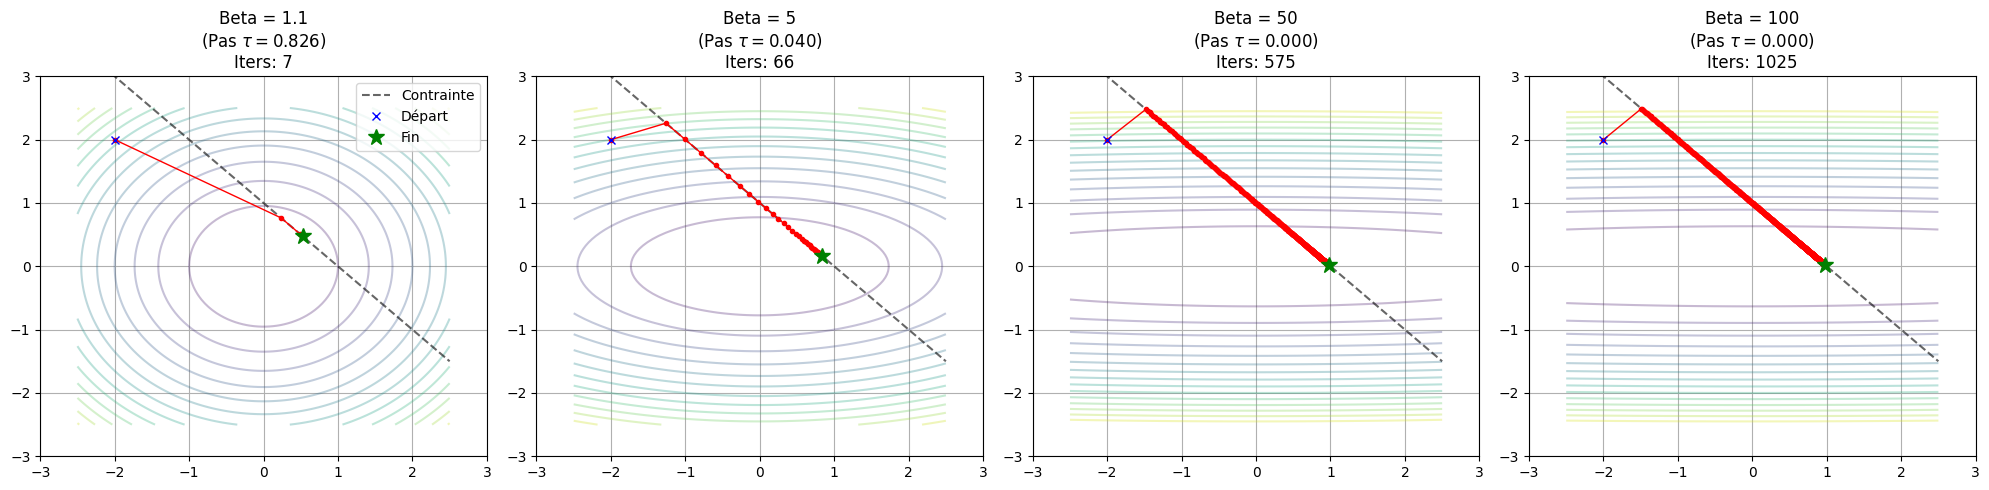

In [15]:
# ---  Définition du problème paramétré par Beta ---
def DGP_Varied_Beta(betas, X0, Nmax, epsilon):
    
    # Configuration de l'affichage (1 ligne, 4 colonnes)
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    
    for i, beta in enumerate(betas):
        ax = axes[i]
        
        # --- 1. Paramètres liés à Beta ---
        # Si Beta augmente, la pente en Y devient brutale.
        # Il faut réduire le pas pour ne pas diverger.
        # On choisit tau = 1/M*M = 1/beta (Standard safe step)
        tau = 1.0 / (beta ** 2)
        
        # --- 2. Définition du problème local ---
        def grad_h(X):
            return np.array([X[0], beta * X[1]])
        
        def PK(X):
            return np.array([(1 + X[0] - X[1])/2, (1 - X[0] + X[1])/2])

        # --- 3. Algorithme ---
        X = np.array(X0, dtype=float)
        path = [X.copy()]
        iters = Nmax
        
        for k in range(Nmax):
            g = grad_h(X)
            X_desc = X - tau * g
            X_new = PK(X_desc)
            
            if np.linalg.norm(X_new - X) < epsilon:
                iters = k + 1
                break
            
            X = X_new
            path.append(X.copy())
            
        path = np.array(path)
        
        # --- 4. Visualisation ---
        # Grille pour les lignes de niveau
        limit = 2.5
        x_grid = np.linspace(-limit, limit, 100)
        y_grid = np.linspace(-limit, limit, 100)
        X_g, Y_g = np.meshgrid(x_grid, y_grid)
        
        # Fonction h(x,y) = 0.5*x^2 + 0.5*beta*y^2
        Z = 0.5 * X_g**2 + 0.5 * beta * Y_g**2
        
        # Tracés
        ax.contour(X_g, Y_g, Z, levels=15, cmap='viridis', alpha=0.3)
        ax.plot(x_grid, 1-x_grid, 'k--', alpha=0.6, label='Contrainte')
        
        ax.plot(path[:, 0], path[:, 1], 'o-', color='red', markersize=3, linewidth=1)
        ax.plot(path[0, 0], path[0, 1], 'bx', label='Départ') # Bleu croix
        ax.plot(path[-1, 0], path[-1, 1], 'g*', markersize=12, label='Fin') # Vert étoile
        
        # Titres et Infos
        ax.set_title(f"Beta = {beta}\n(Pas $\\tau={tau:.3f}$)\nIters: {iters}")
        ax.set_xlim(-3, 3)
        ax.set_ylim(-3, 3)
        ax.grid(True)
        if i == 0:
            ax.legend()

    plt.tight_layout()
    plt.show()

# --- EXÉCUTION ---
betas_to_test = [1.1, 5, 50, 100]
X0 = [-2.0, 2.0]
Nmax = 2000  # On augmente Nmax car beta=100 converge lentement
epsilon = 1e-4

DGP_Varied_Beta(betas_to_test, X0, Nmax, epsilon)